# FLIM Workflow Example

In [1]:
from skimage import morphology
import napari
from napari.utils import nbscreenshot
import numpy as np
import napari_flim_phasor_plotter as flim_plot
import napari_clusters_plotter as ncp
from skimage.measure import label, regionprops_table

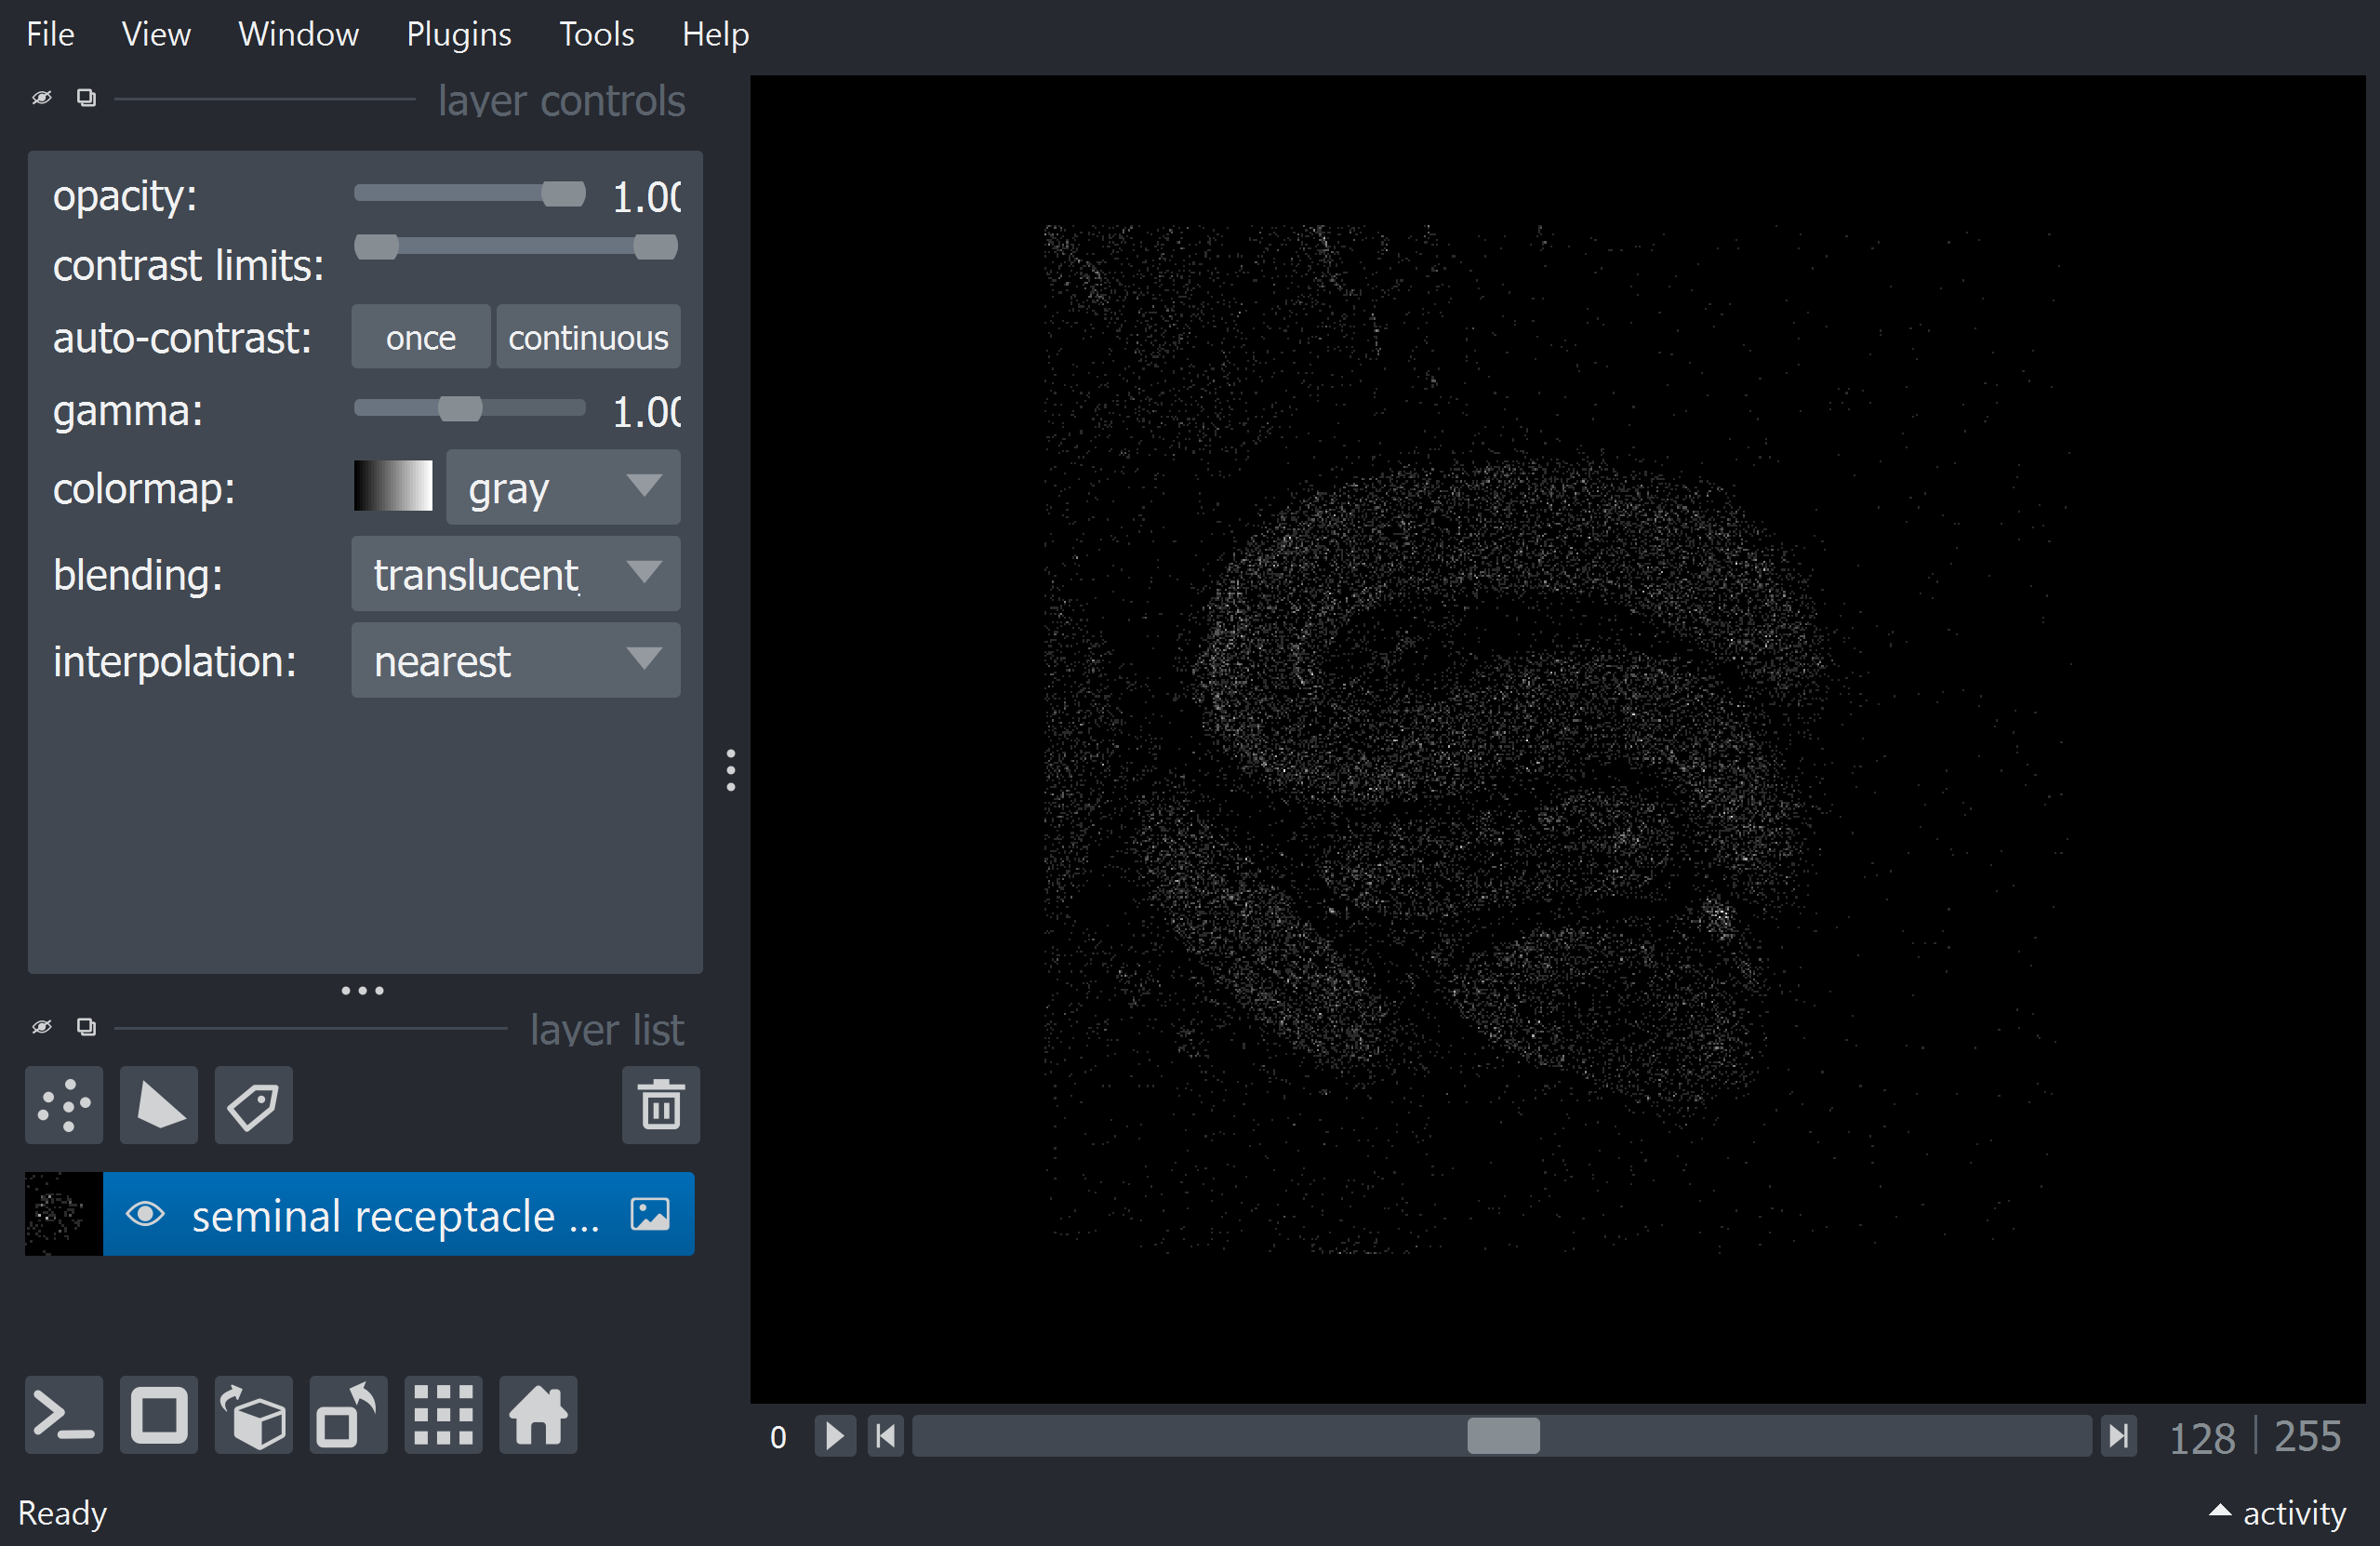

In [2]:
viewer = napari.Viewer()
list_layerdatatuple = flim_plot._sample_data.load_seminal_receptacle_image()
image_layer = viewer.add_image(list_layerdatatuple[0][0], **list_layerdatatuple[0][1])
nbscreenshot(viewer)

- Run napari-flim-phasor-plotter > Calculate Phasors (median = 1, threshold = 15)

In [4]:
# This does not work yet, need to expose the _widget module
# flim_plot._widget.make_flim_phasor_plot(image_layer,
#                           threshold = 15,
#                           apply_median =True,
#                           median_n = 1,
#                           napari_viewer = viewer)

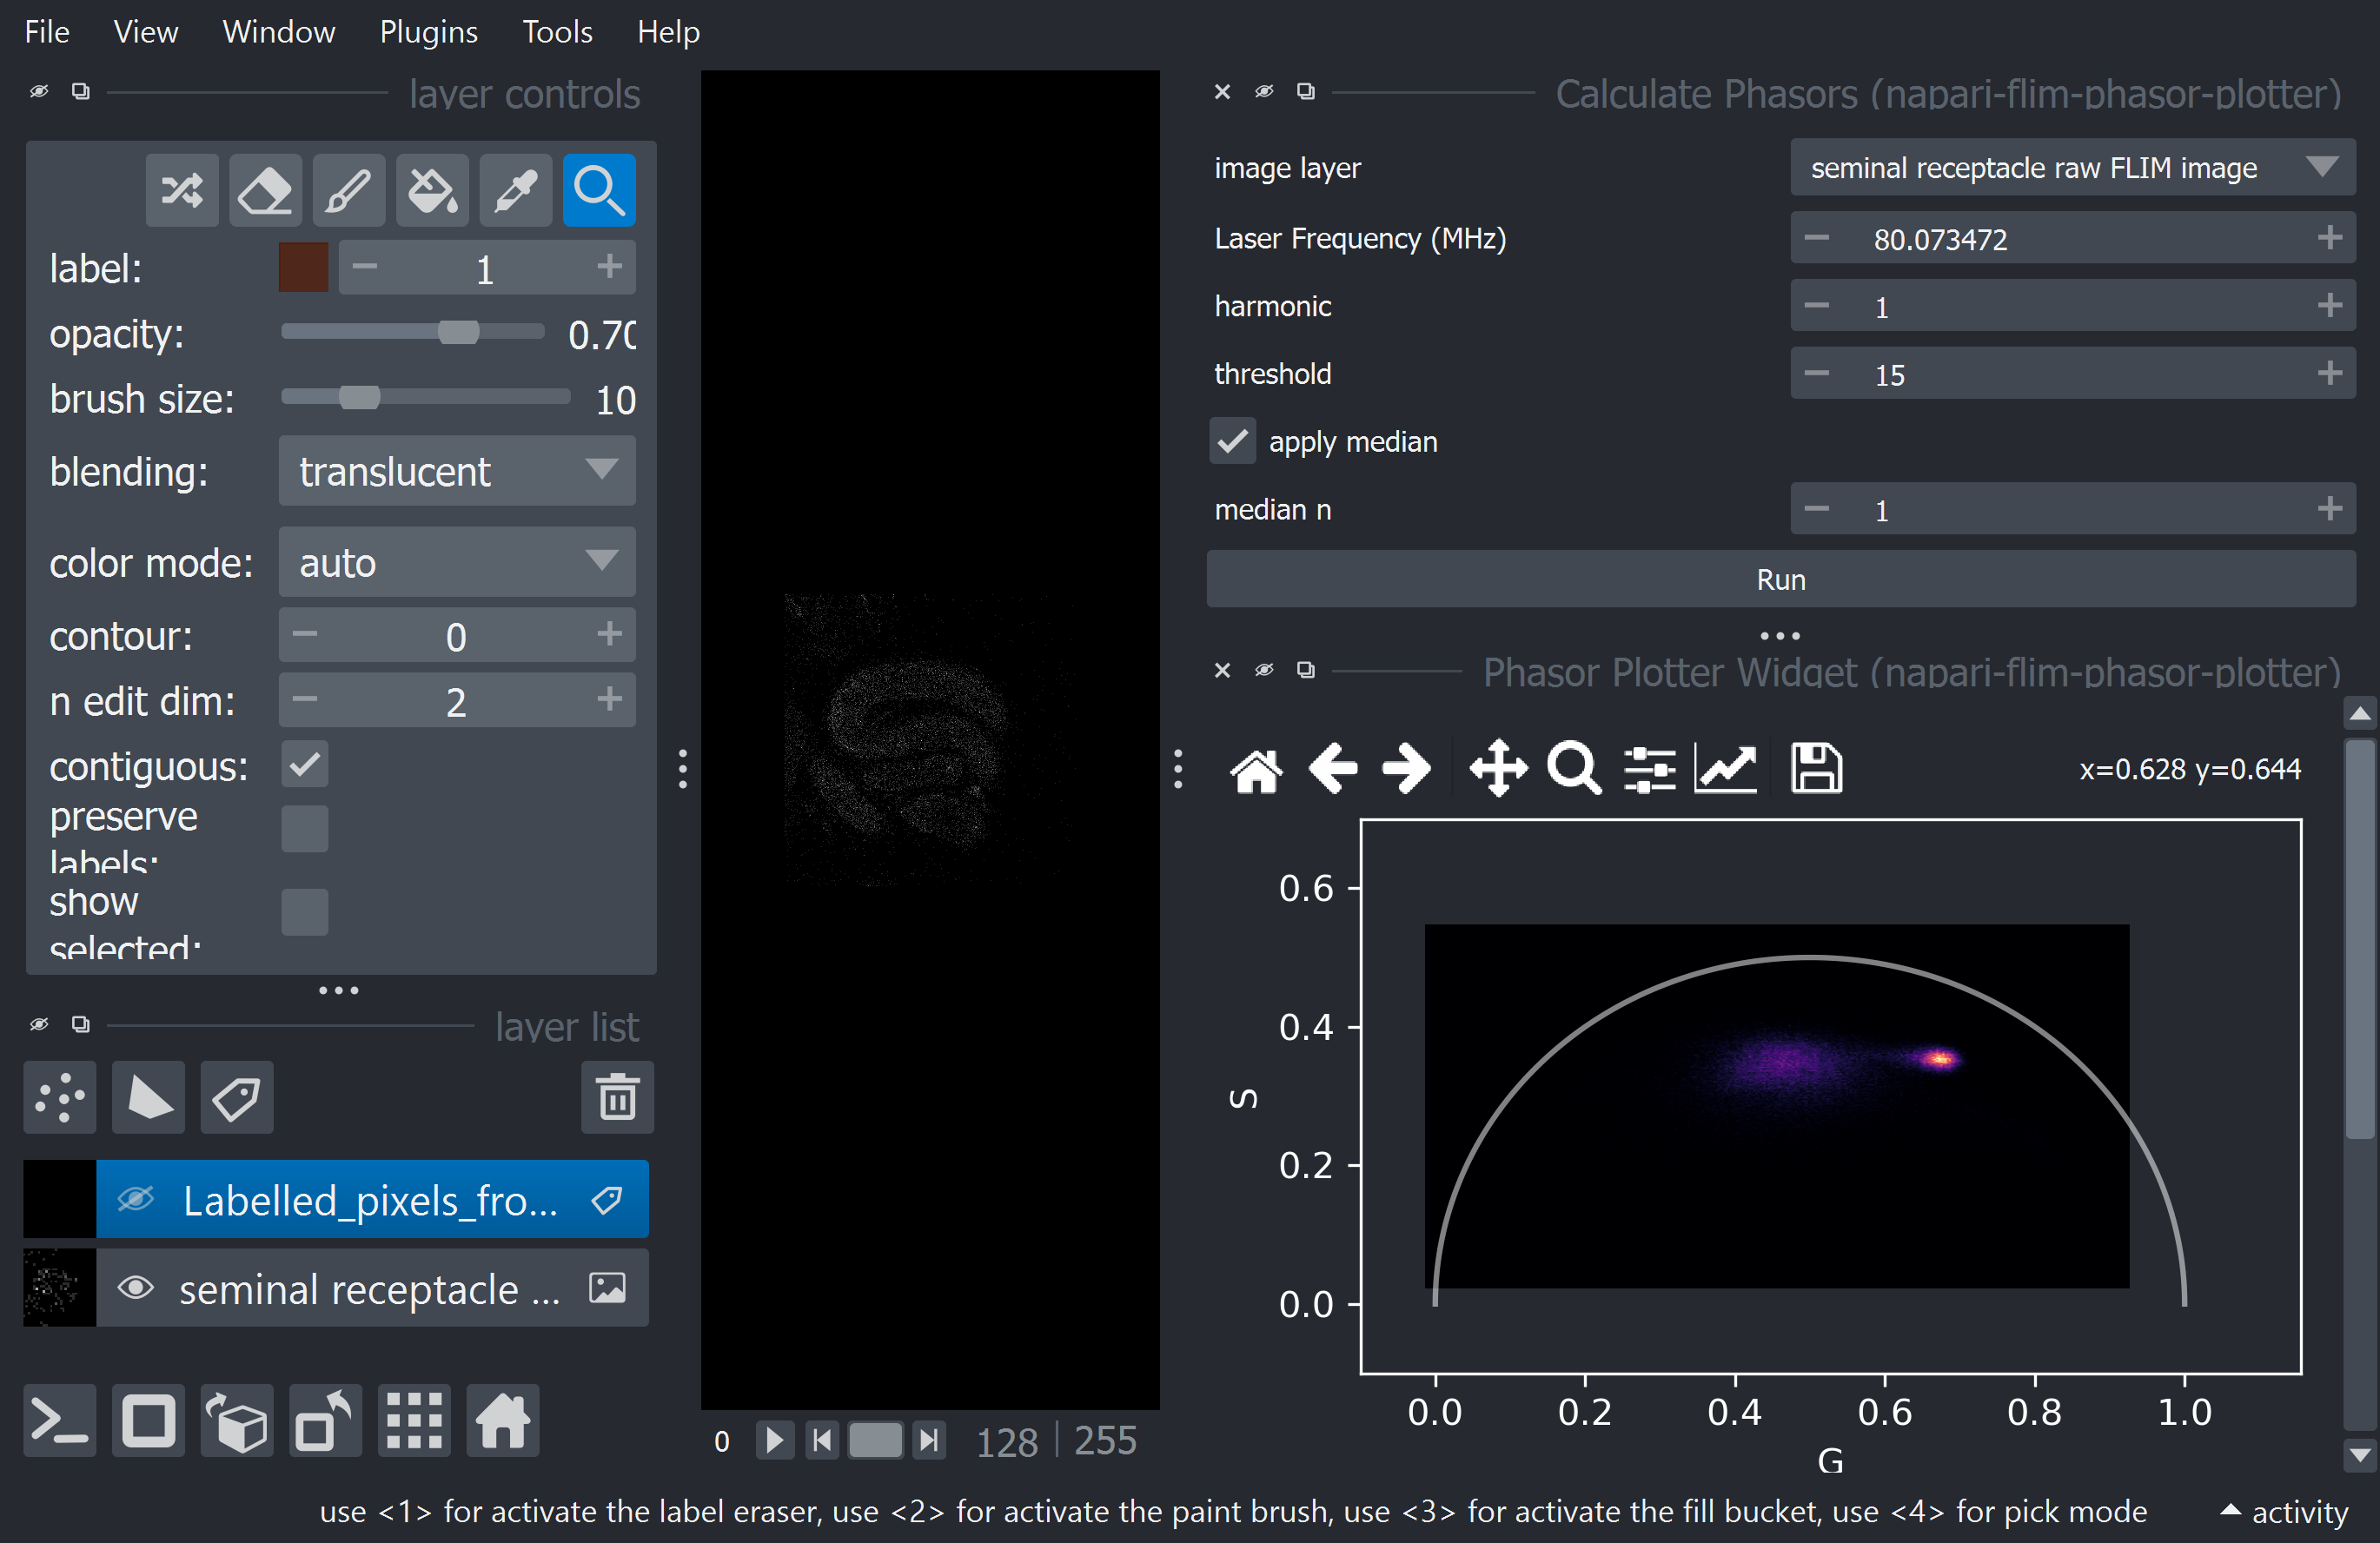

In [3]:
nbscreenshot(viewer)

Display histogram (heatmap) in log scale

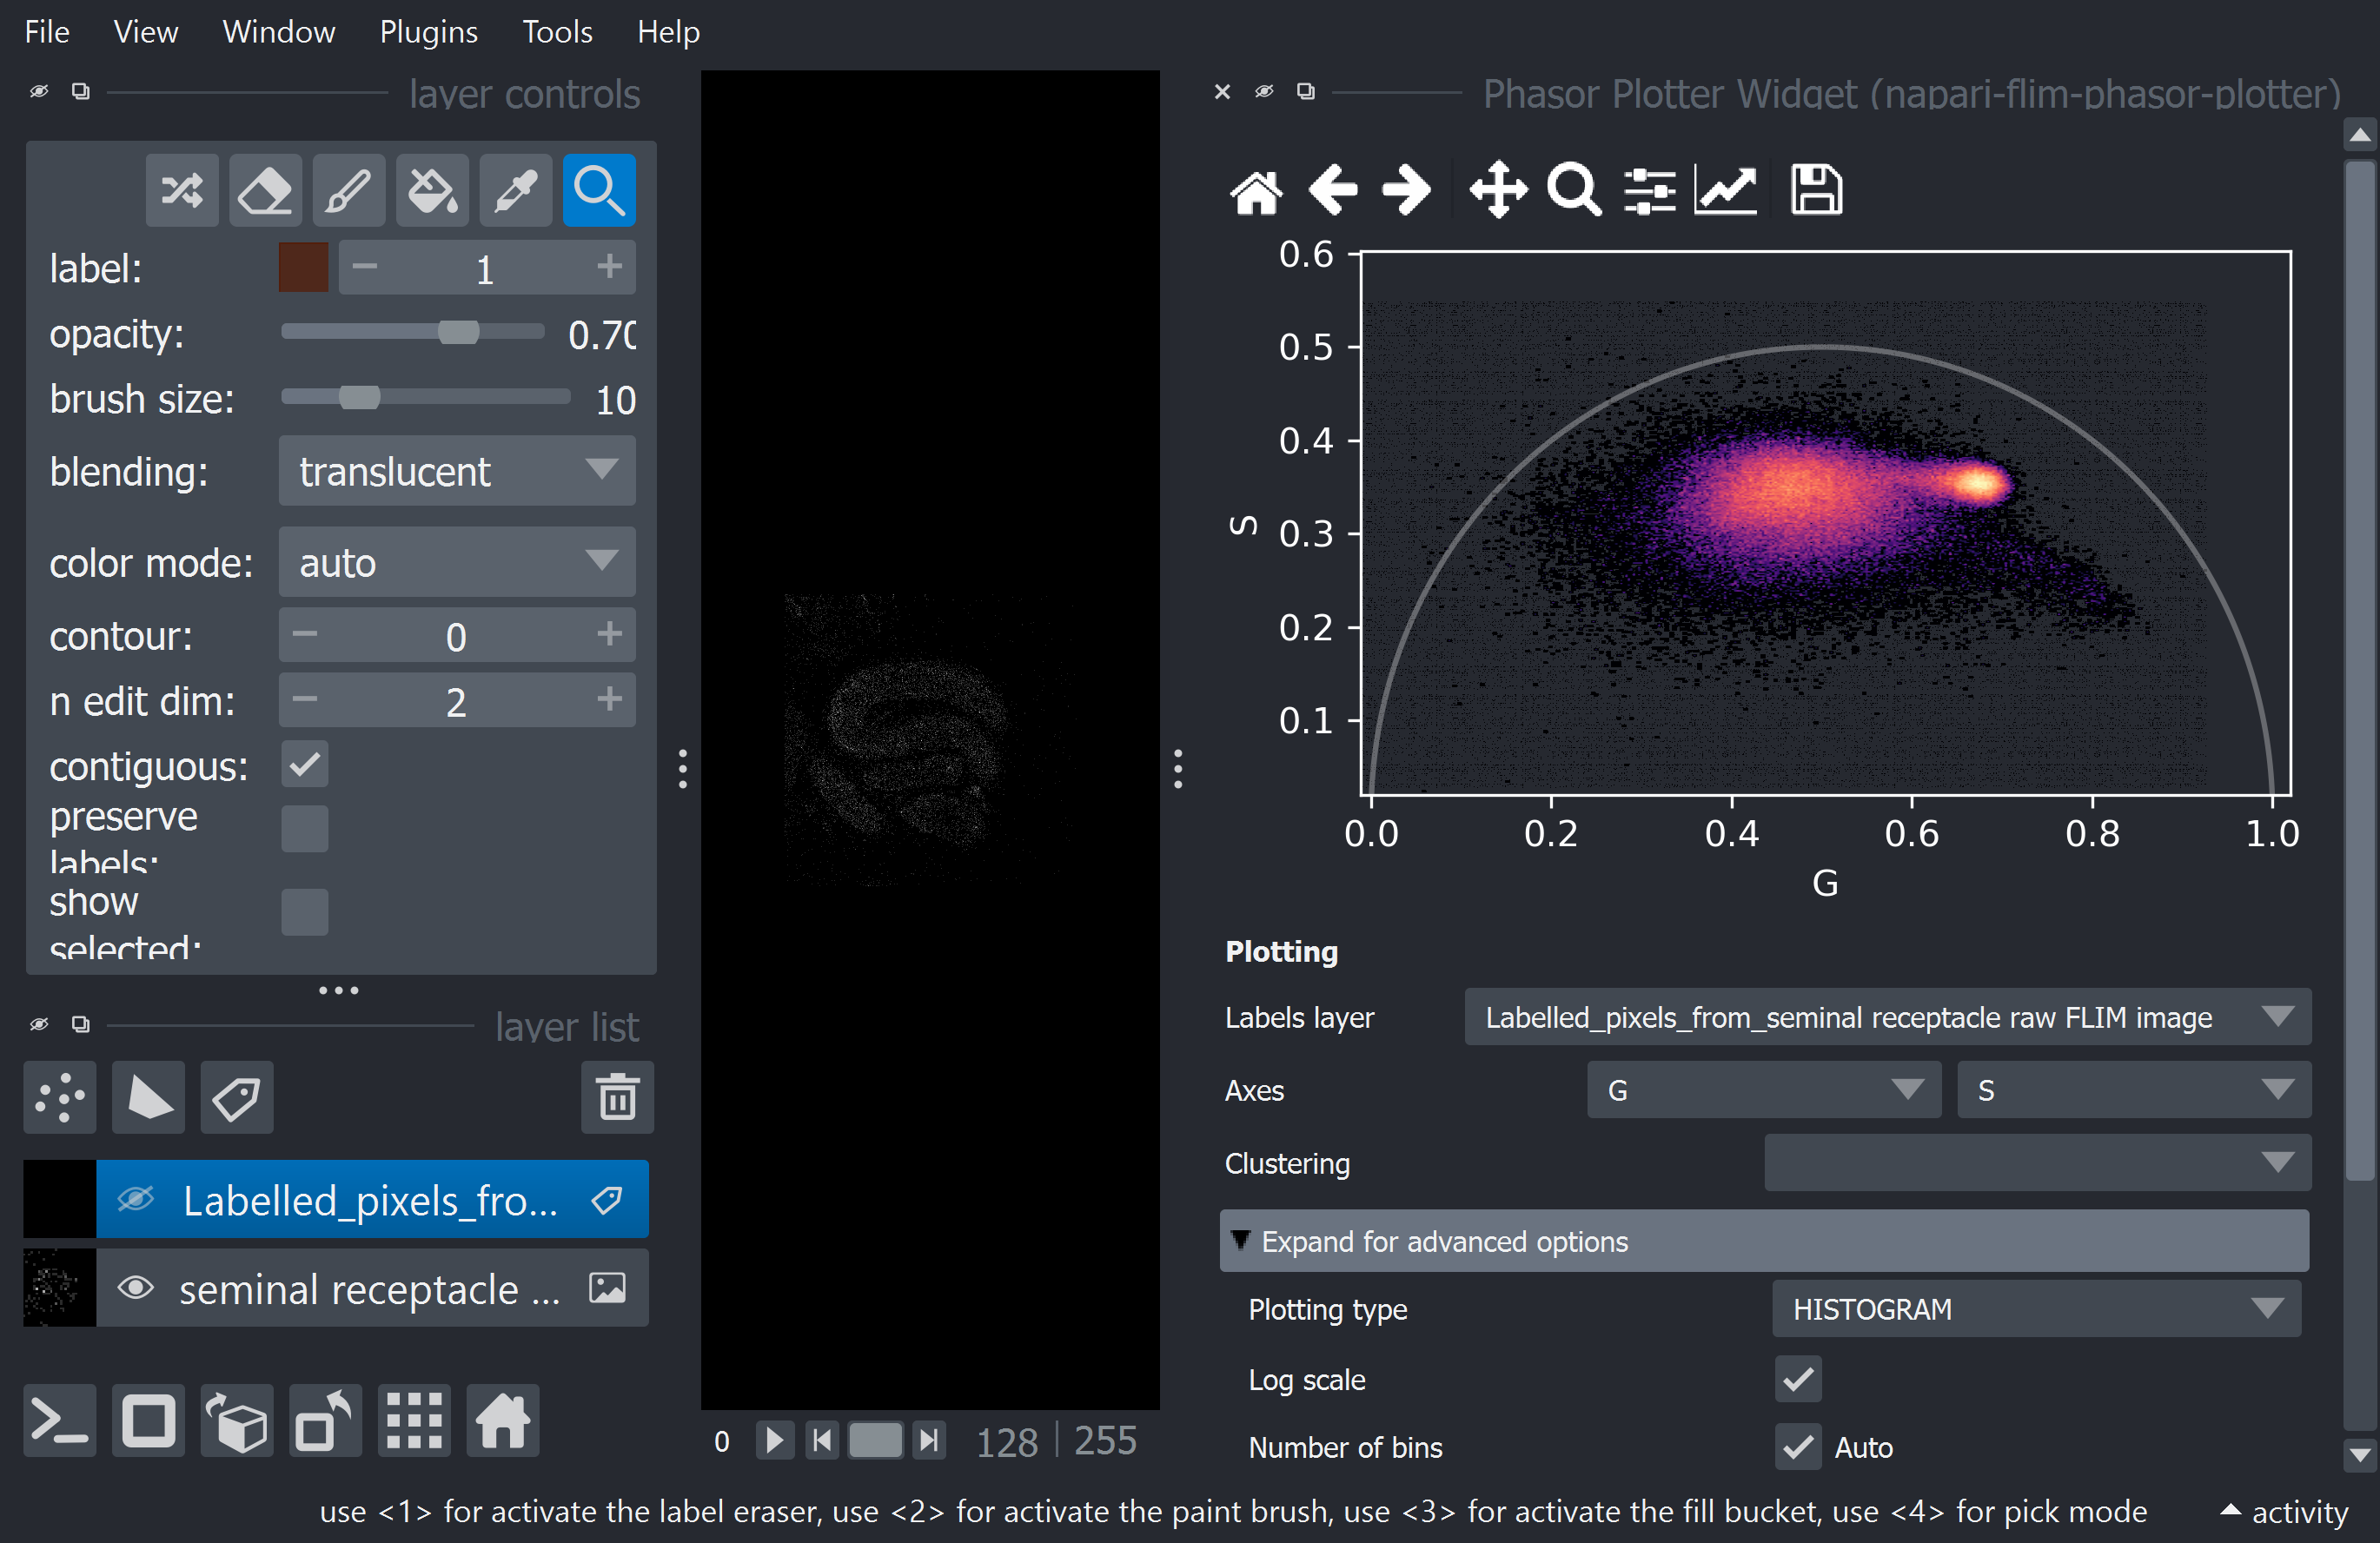

Selected labels layer: Labelled_pixels_from_seminal receptacle raw FLIM image
Selected measurements: ['G', 'S']
Selected clustering method: HDBSCAN
HDBSCAN predictions finished.
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


In [4]:
nbscreenshot(viewer)

- Apply HDBSCAN from napari-clusters-potter to Phasor Plot (min_cluster_size=40, min_samples=40)
- Visualize cluster results over Phasor Plot (one may need to click on Update Axes/Clustering Options)

In [ ]:
# Check later how to do that via code
# ncp.ClusteringWidget(viewer, image_layer, clustering_algorithm='HDBSCAN', min_cluster_size=40, min_samples=40)

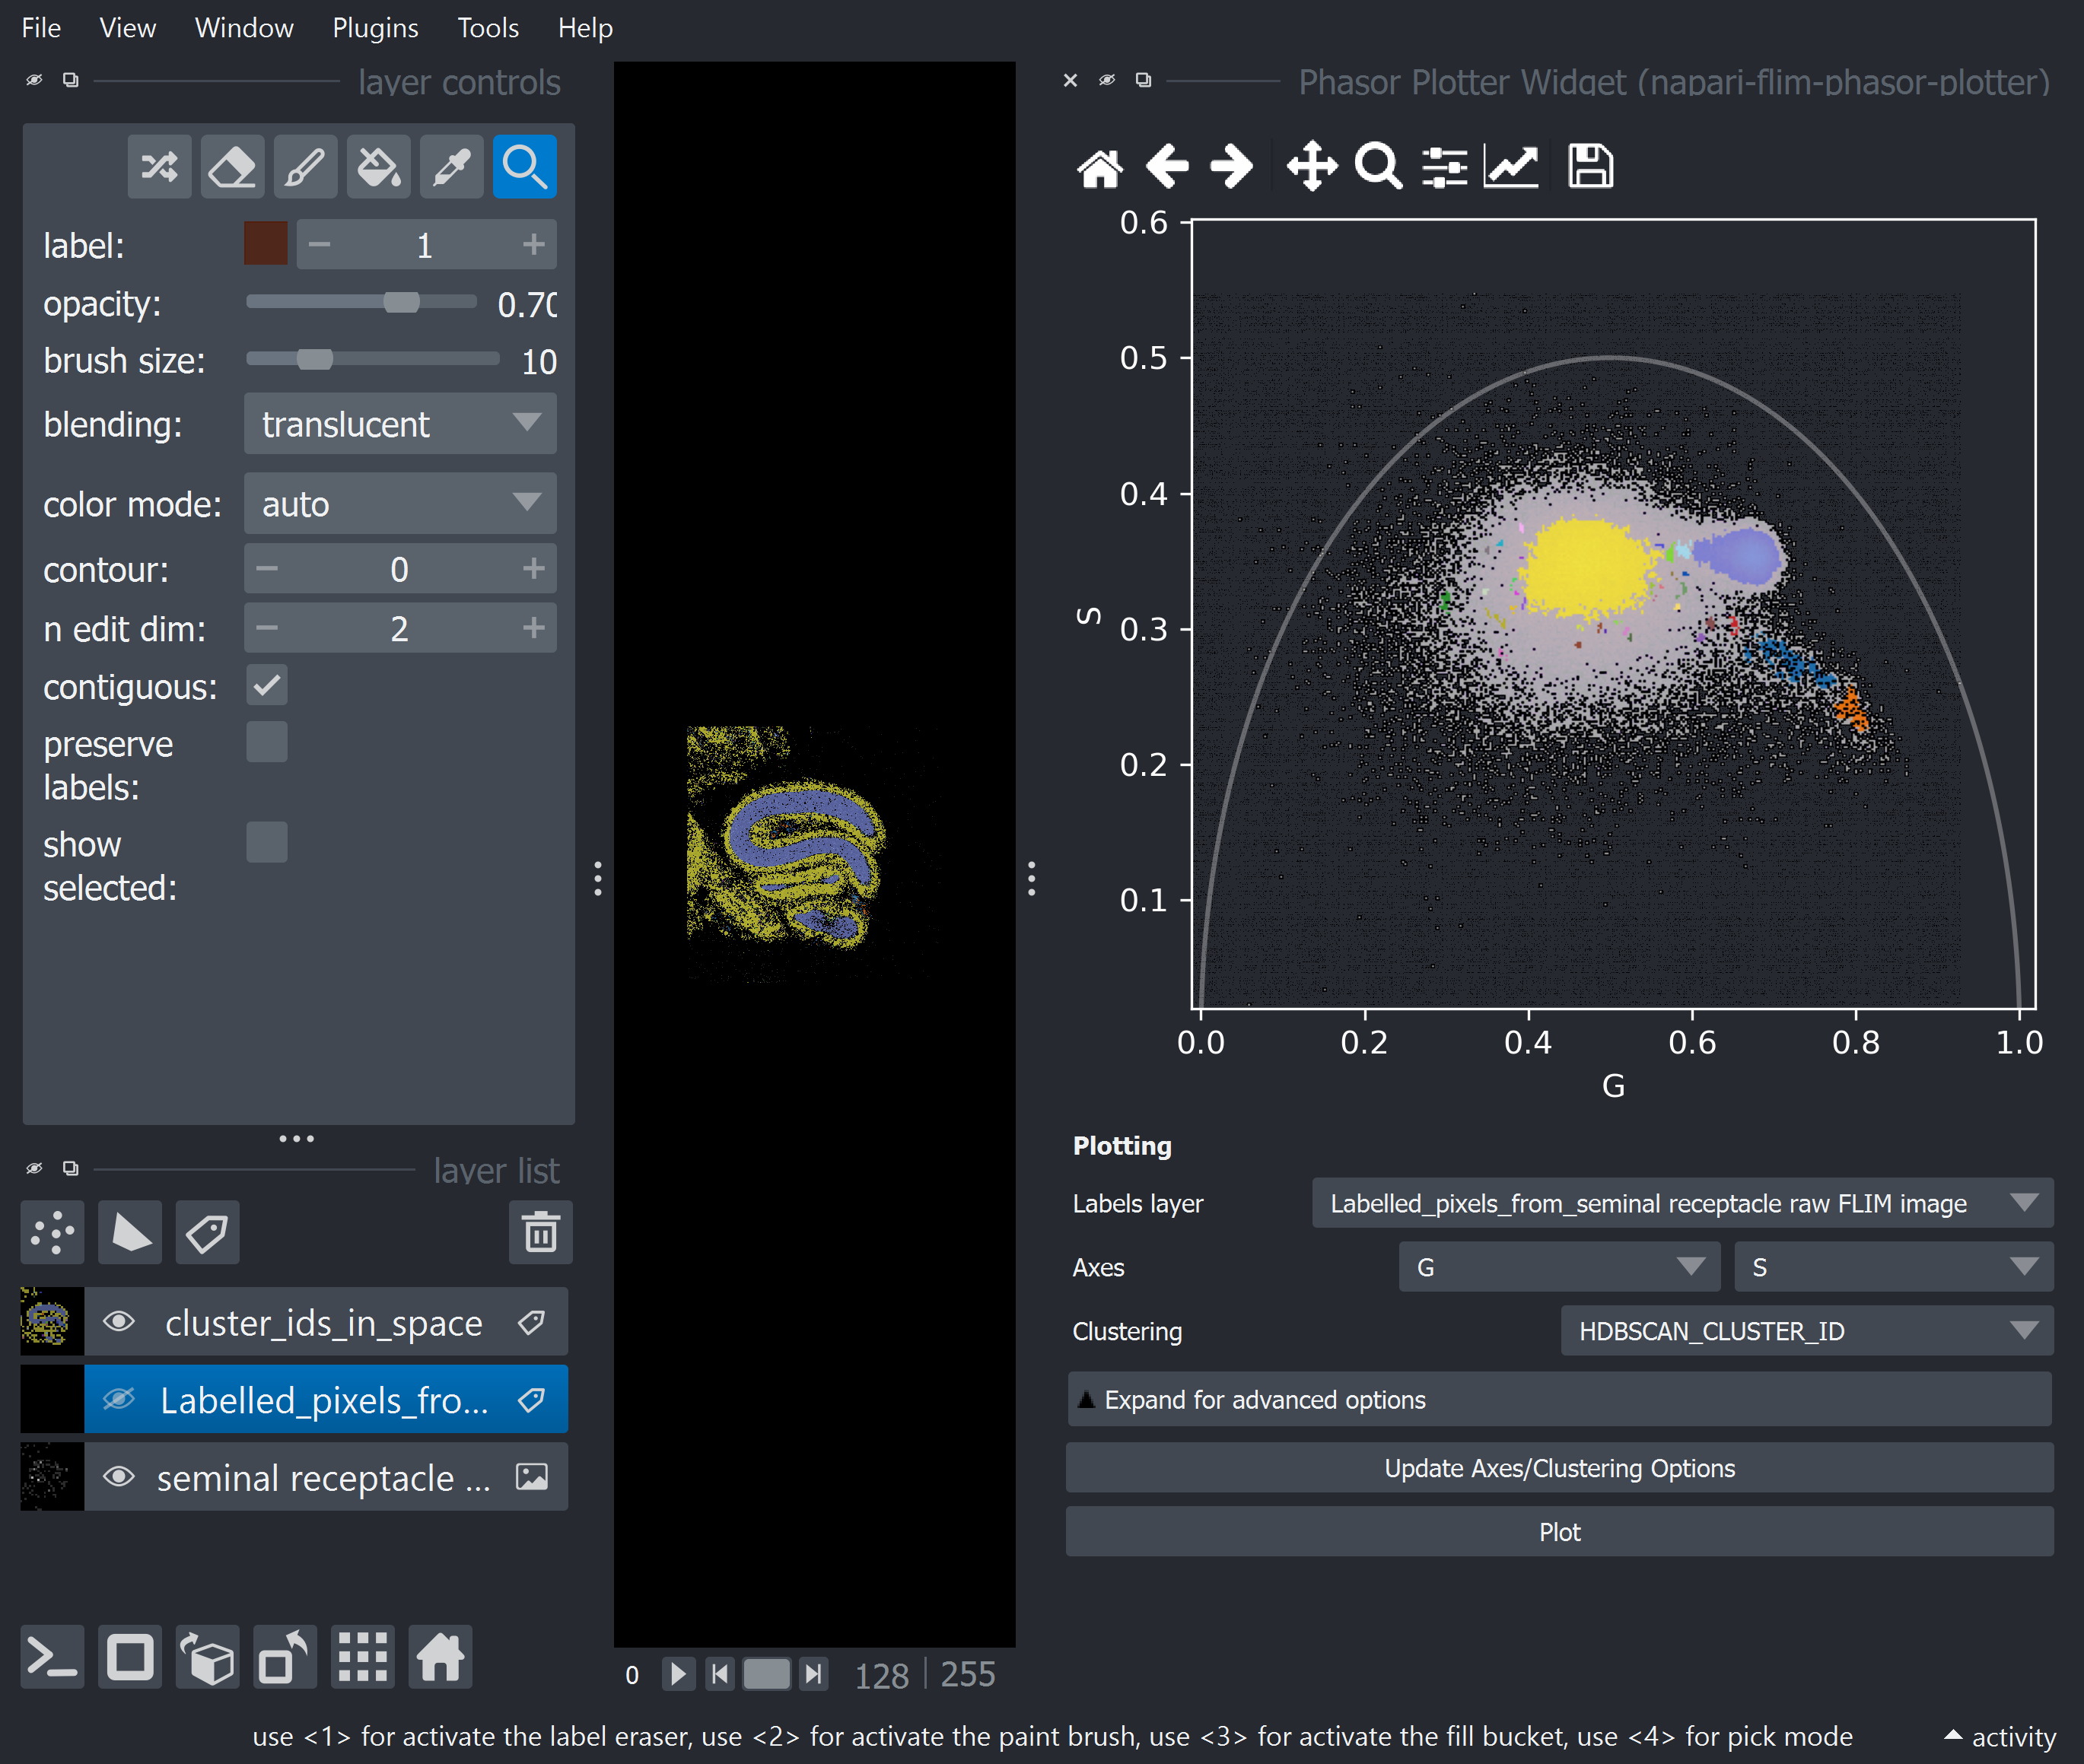

In [5]:
nbscreenshot(viewer)

Flatten data (remove unidimensional axes)

In [6]:
labels = np.squeeze(np.asarray(viewer.layers[-1].data))

Select label of interest (could be by size)

In [7]:
vesicle_labels = np.copy(labels)
vesicle_labels[vesicle_labels != 20] = 0

Copy labels layer display properties

In [8]:
cluster_result_labels_layer = viewer.layers[-1]

In [10]:
viewer.add_labels(vesicle_labels, color = cluster_result_labels_layer.color)

<Labels layer 'vesicle_labels' at 0x26c985c6a00>

Hide other labels layers

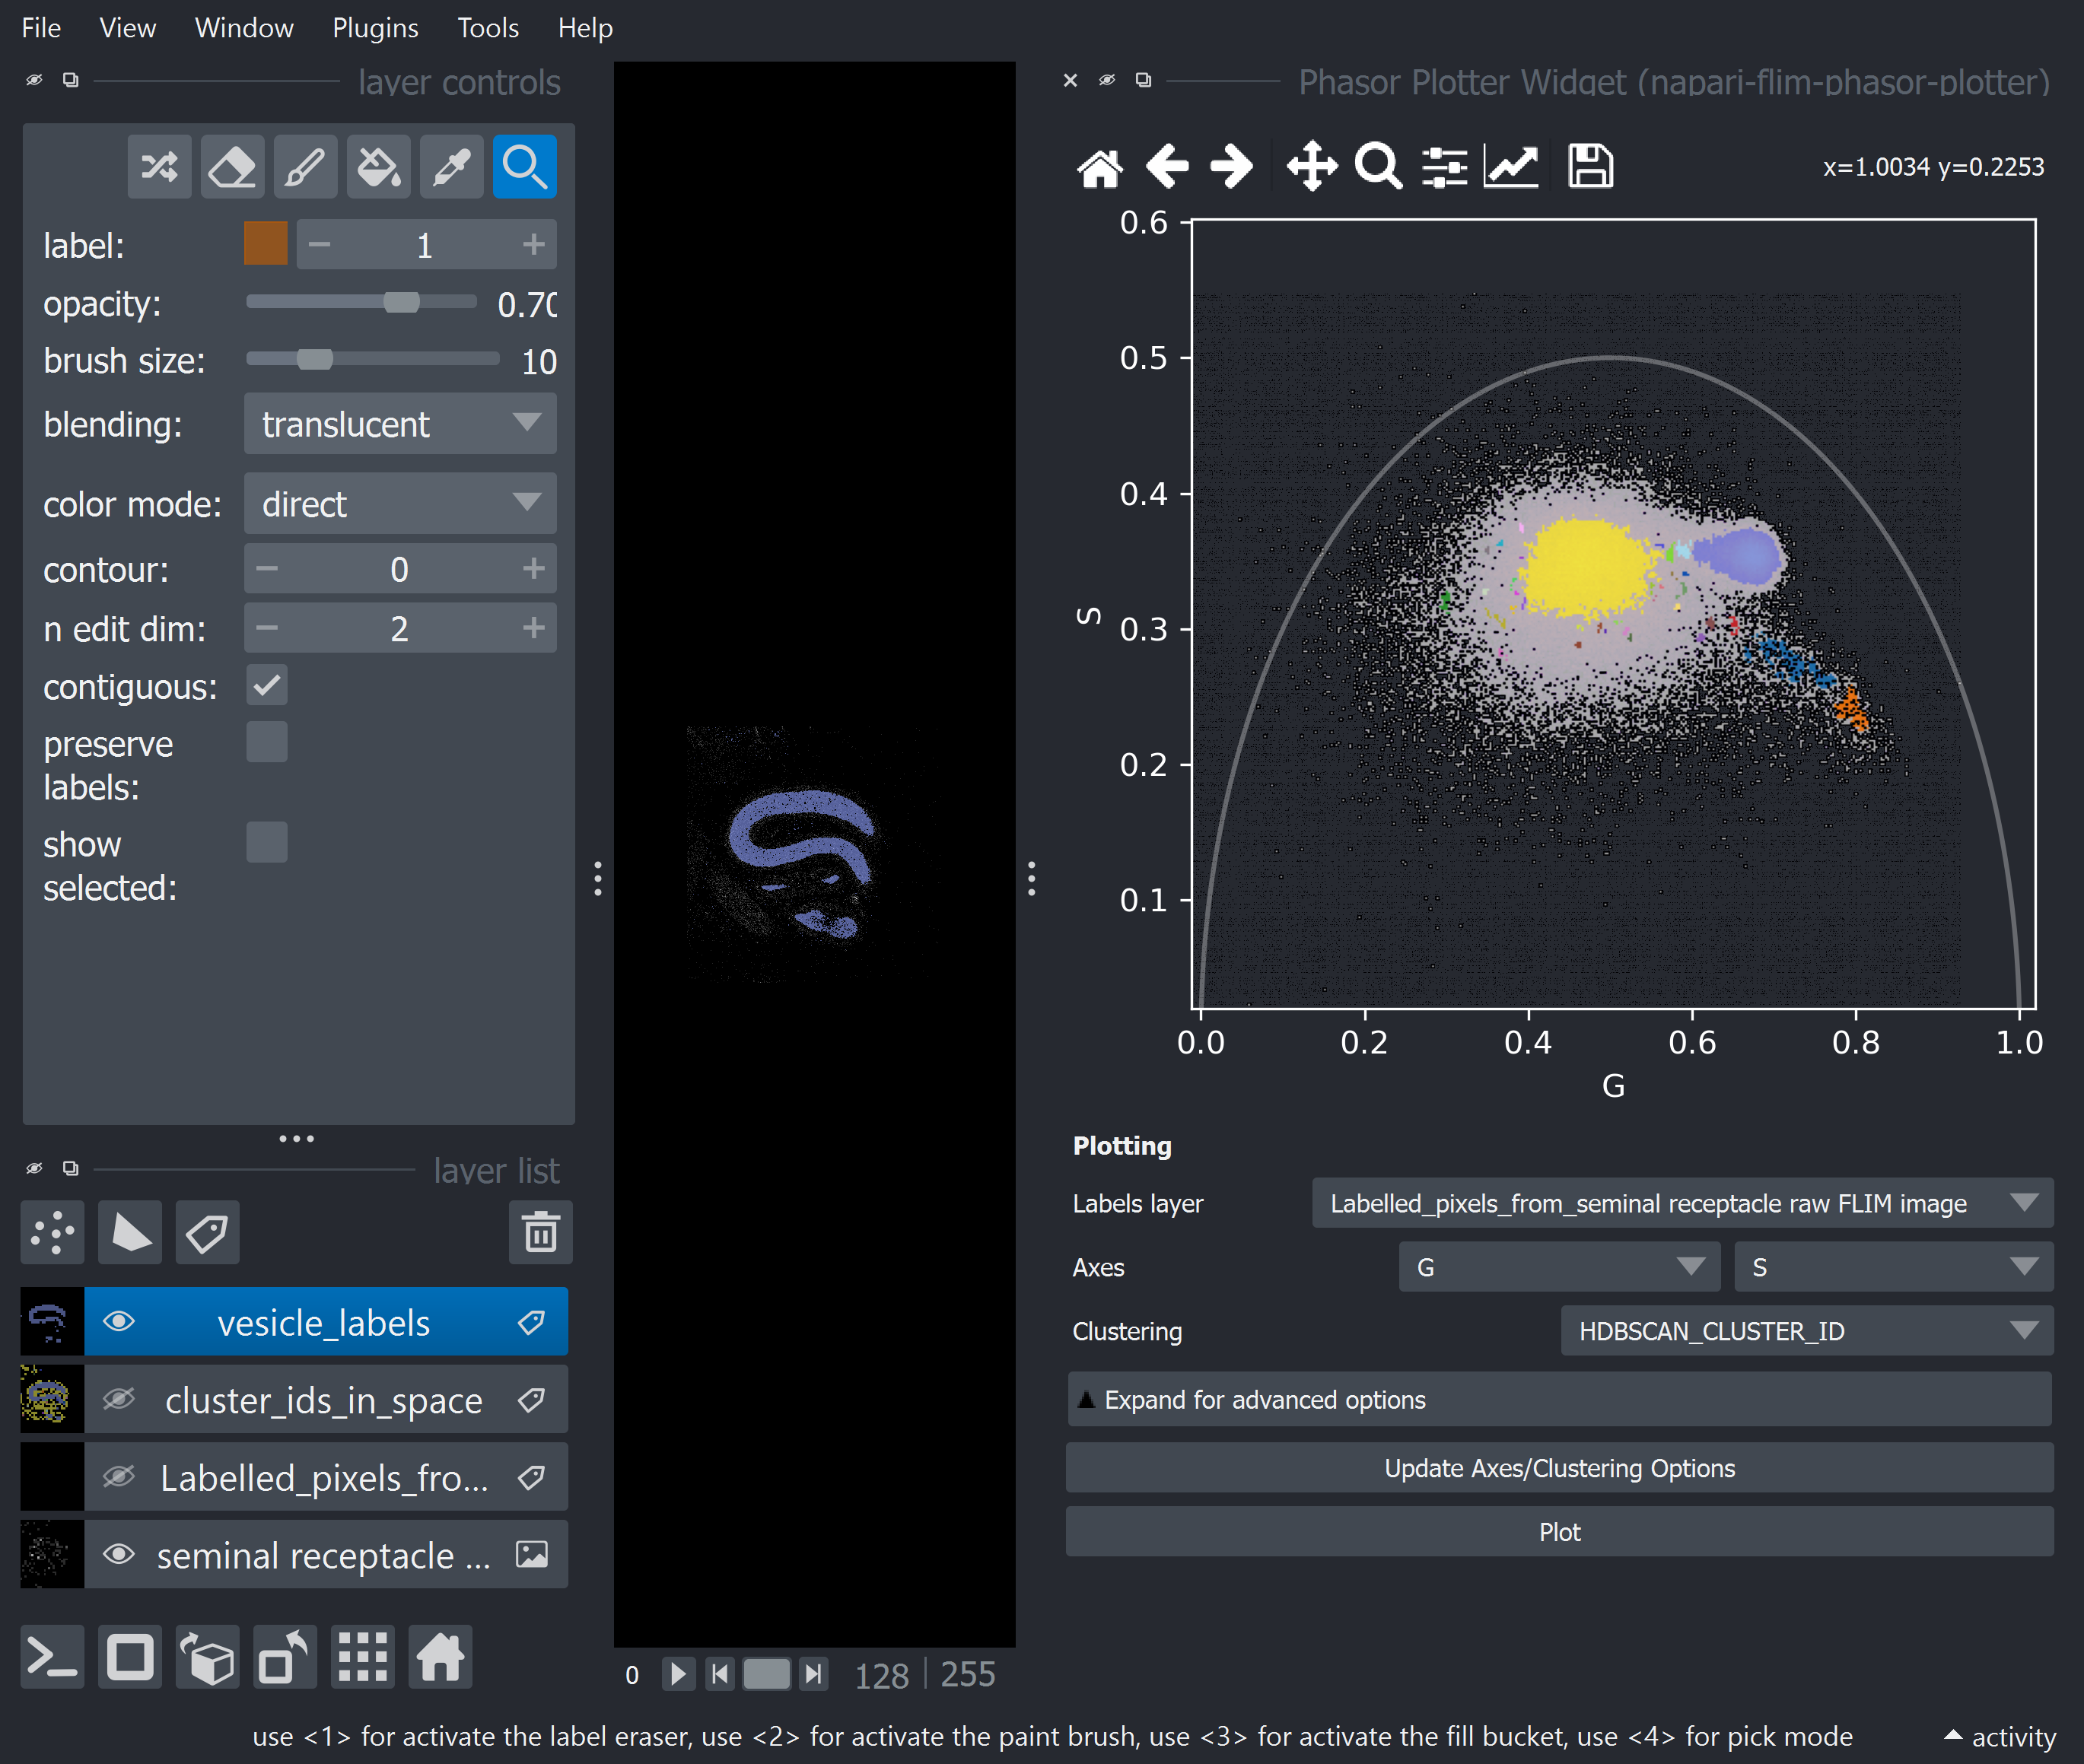

In [12]:
nbscreenshot(viewer)

Fill Holes

In [13]:
closed_vesicle_labels = morphology.area_closing(vesicle_labels)

Connect objects

In [14]:
closed_vesicle_labels2 = morphology.isotropic_closing(closed_vesicle_labels, 3)

Remove small objects

In [15]:
open_vesicle_labels = morphology.isotropic_opening(closed_vesicle_labels2, 3)

In [16]:
open_vesicle_labels_int = open_vesicle_labels.astype(np.uint16)*20
np.unique(open_vesicle_labels_int)

array([ 0, 20], dtype=uint16)

In [17]:
viewer.add_labels(open_vesicle_labels_int, color = cluster_result_labels_layer.color, name = 'smoothed_receptacle_labels')

<Labels layer 'smoothed_receptacle_labels' at 0x26cd83c6760>

Hide other labels layers

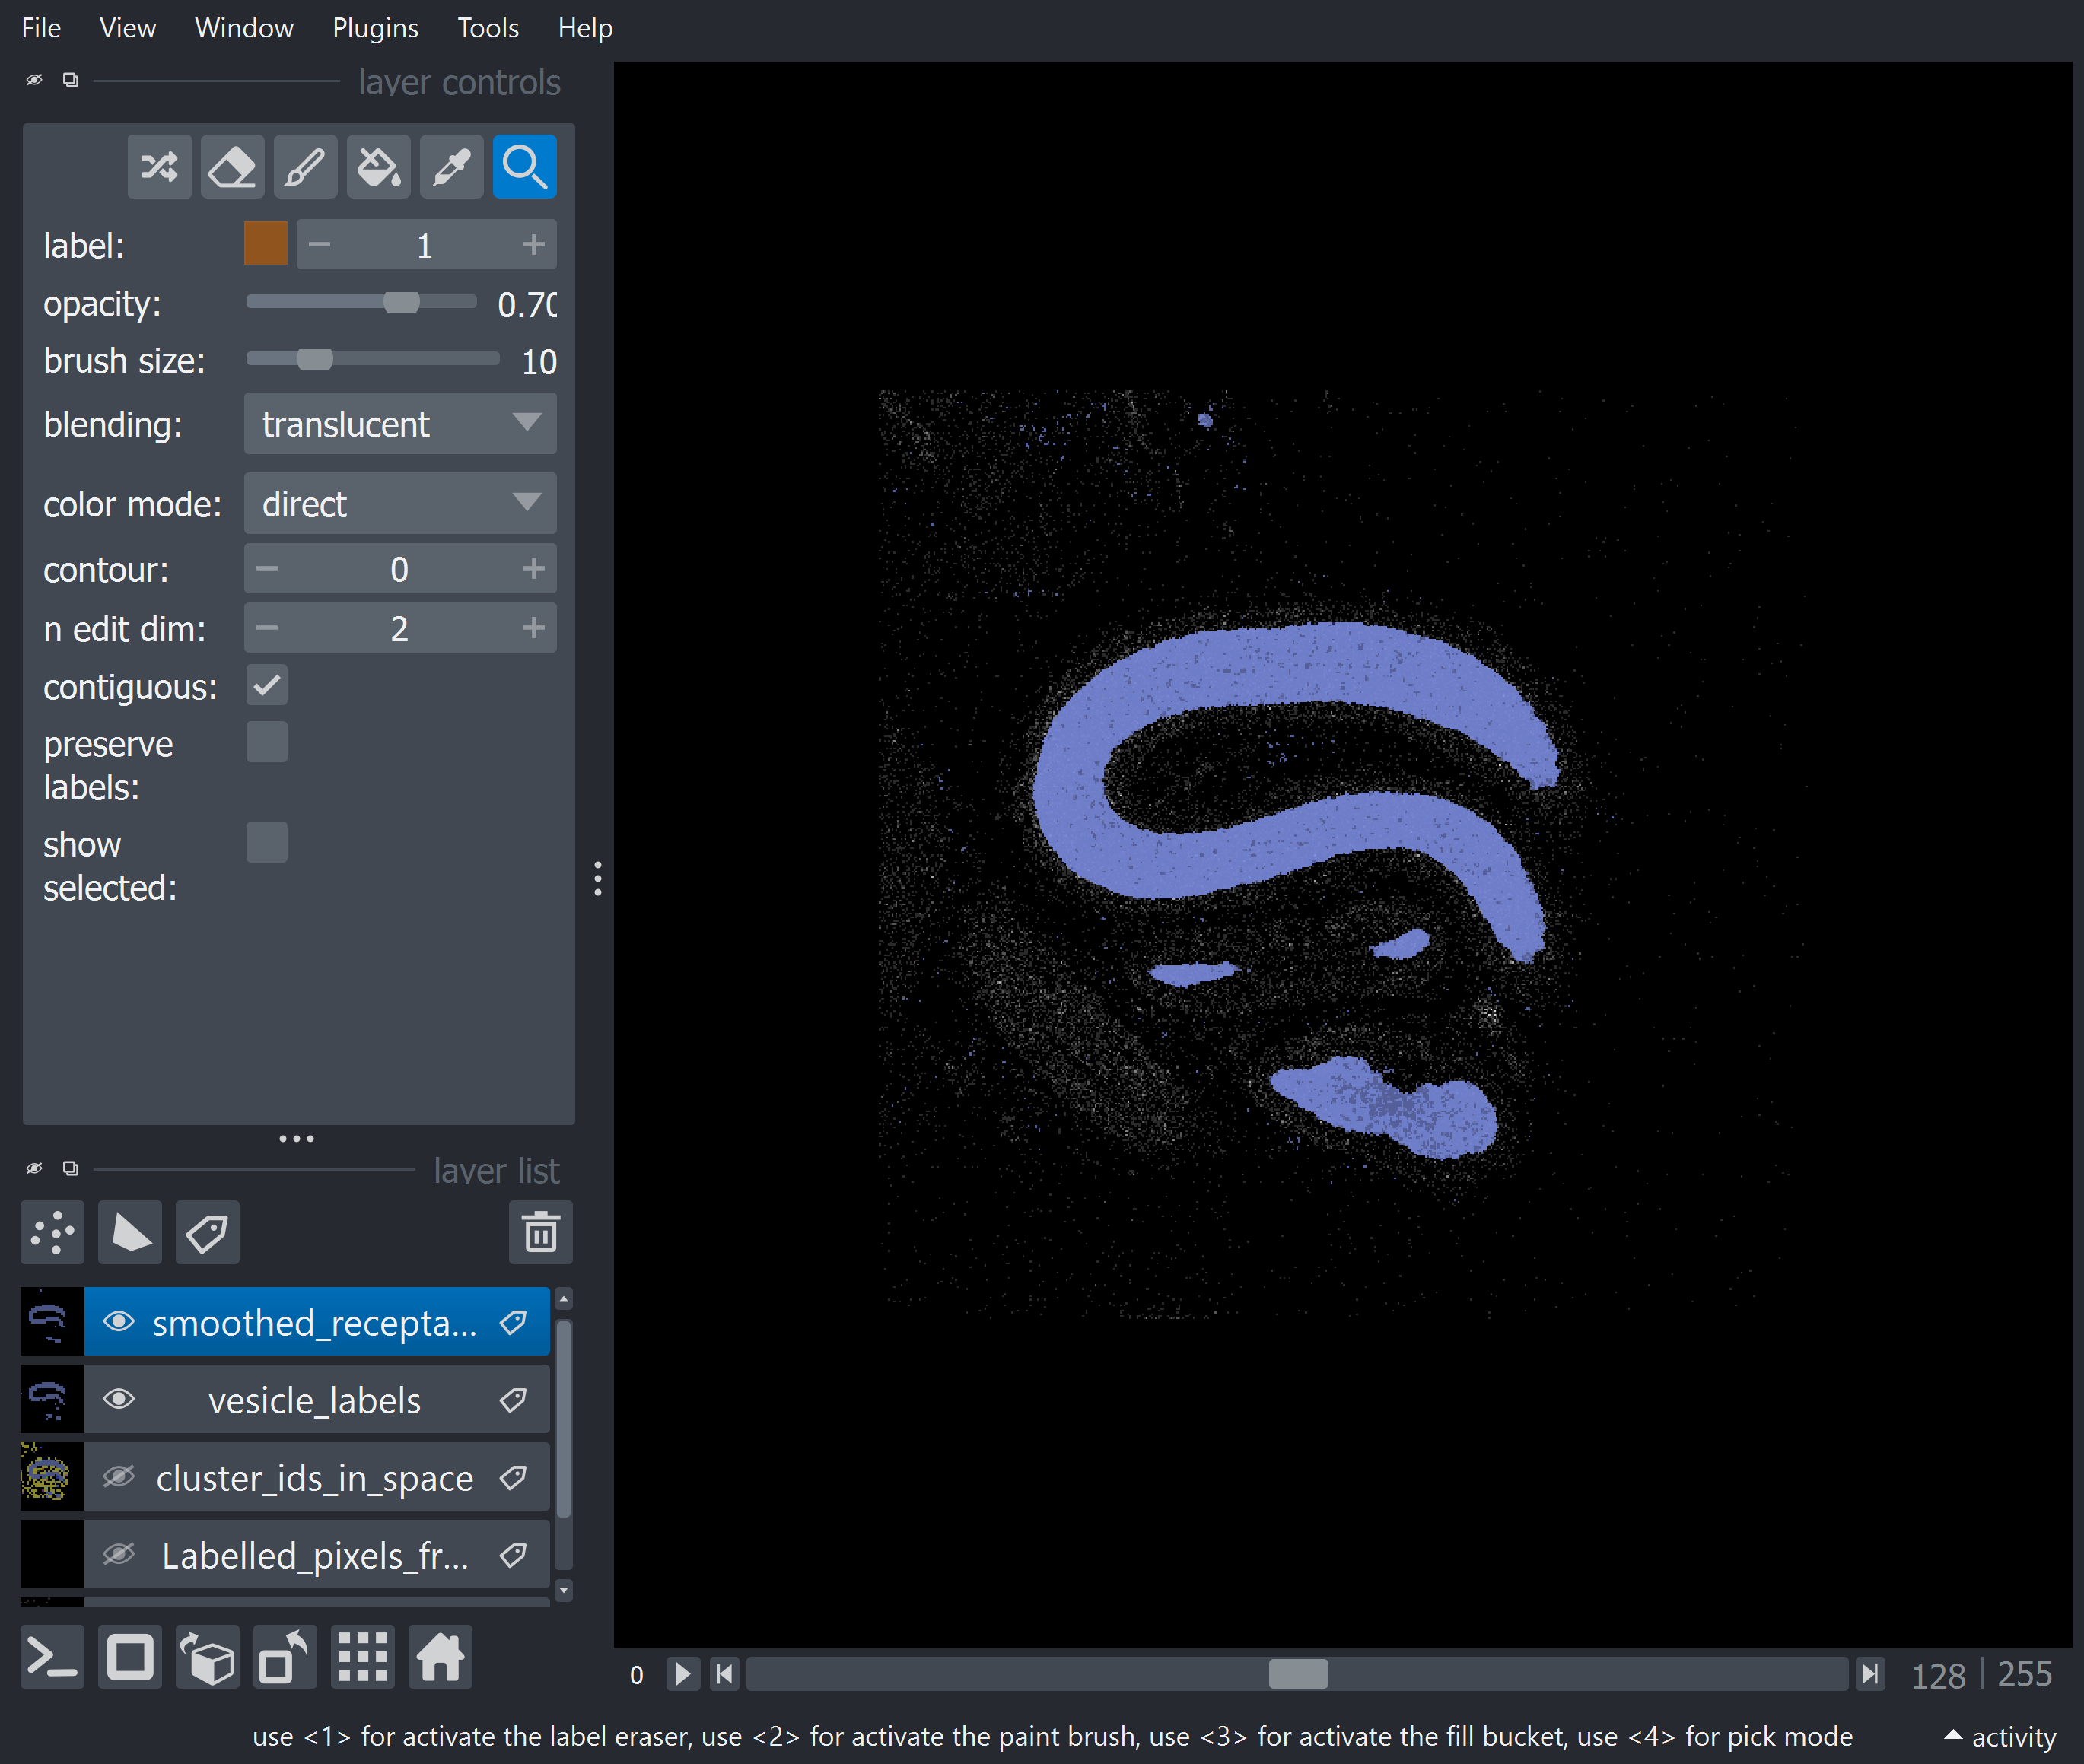

In [18]:
nbscreenshot(viewer)

Connected Components Labeling

In [19]:
objects_labels = label(open_vesicle_labels)
properties = regionprops_table(label_image = objects_labels, properties = ['label', 'area'])

In [20]:
viewer.add_labels(objects_labels, features = properties, name = 'receptacle_objects')

<Labels layer 'receptacle_objects' at 0x26cb76e3910>

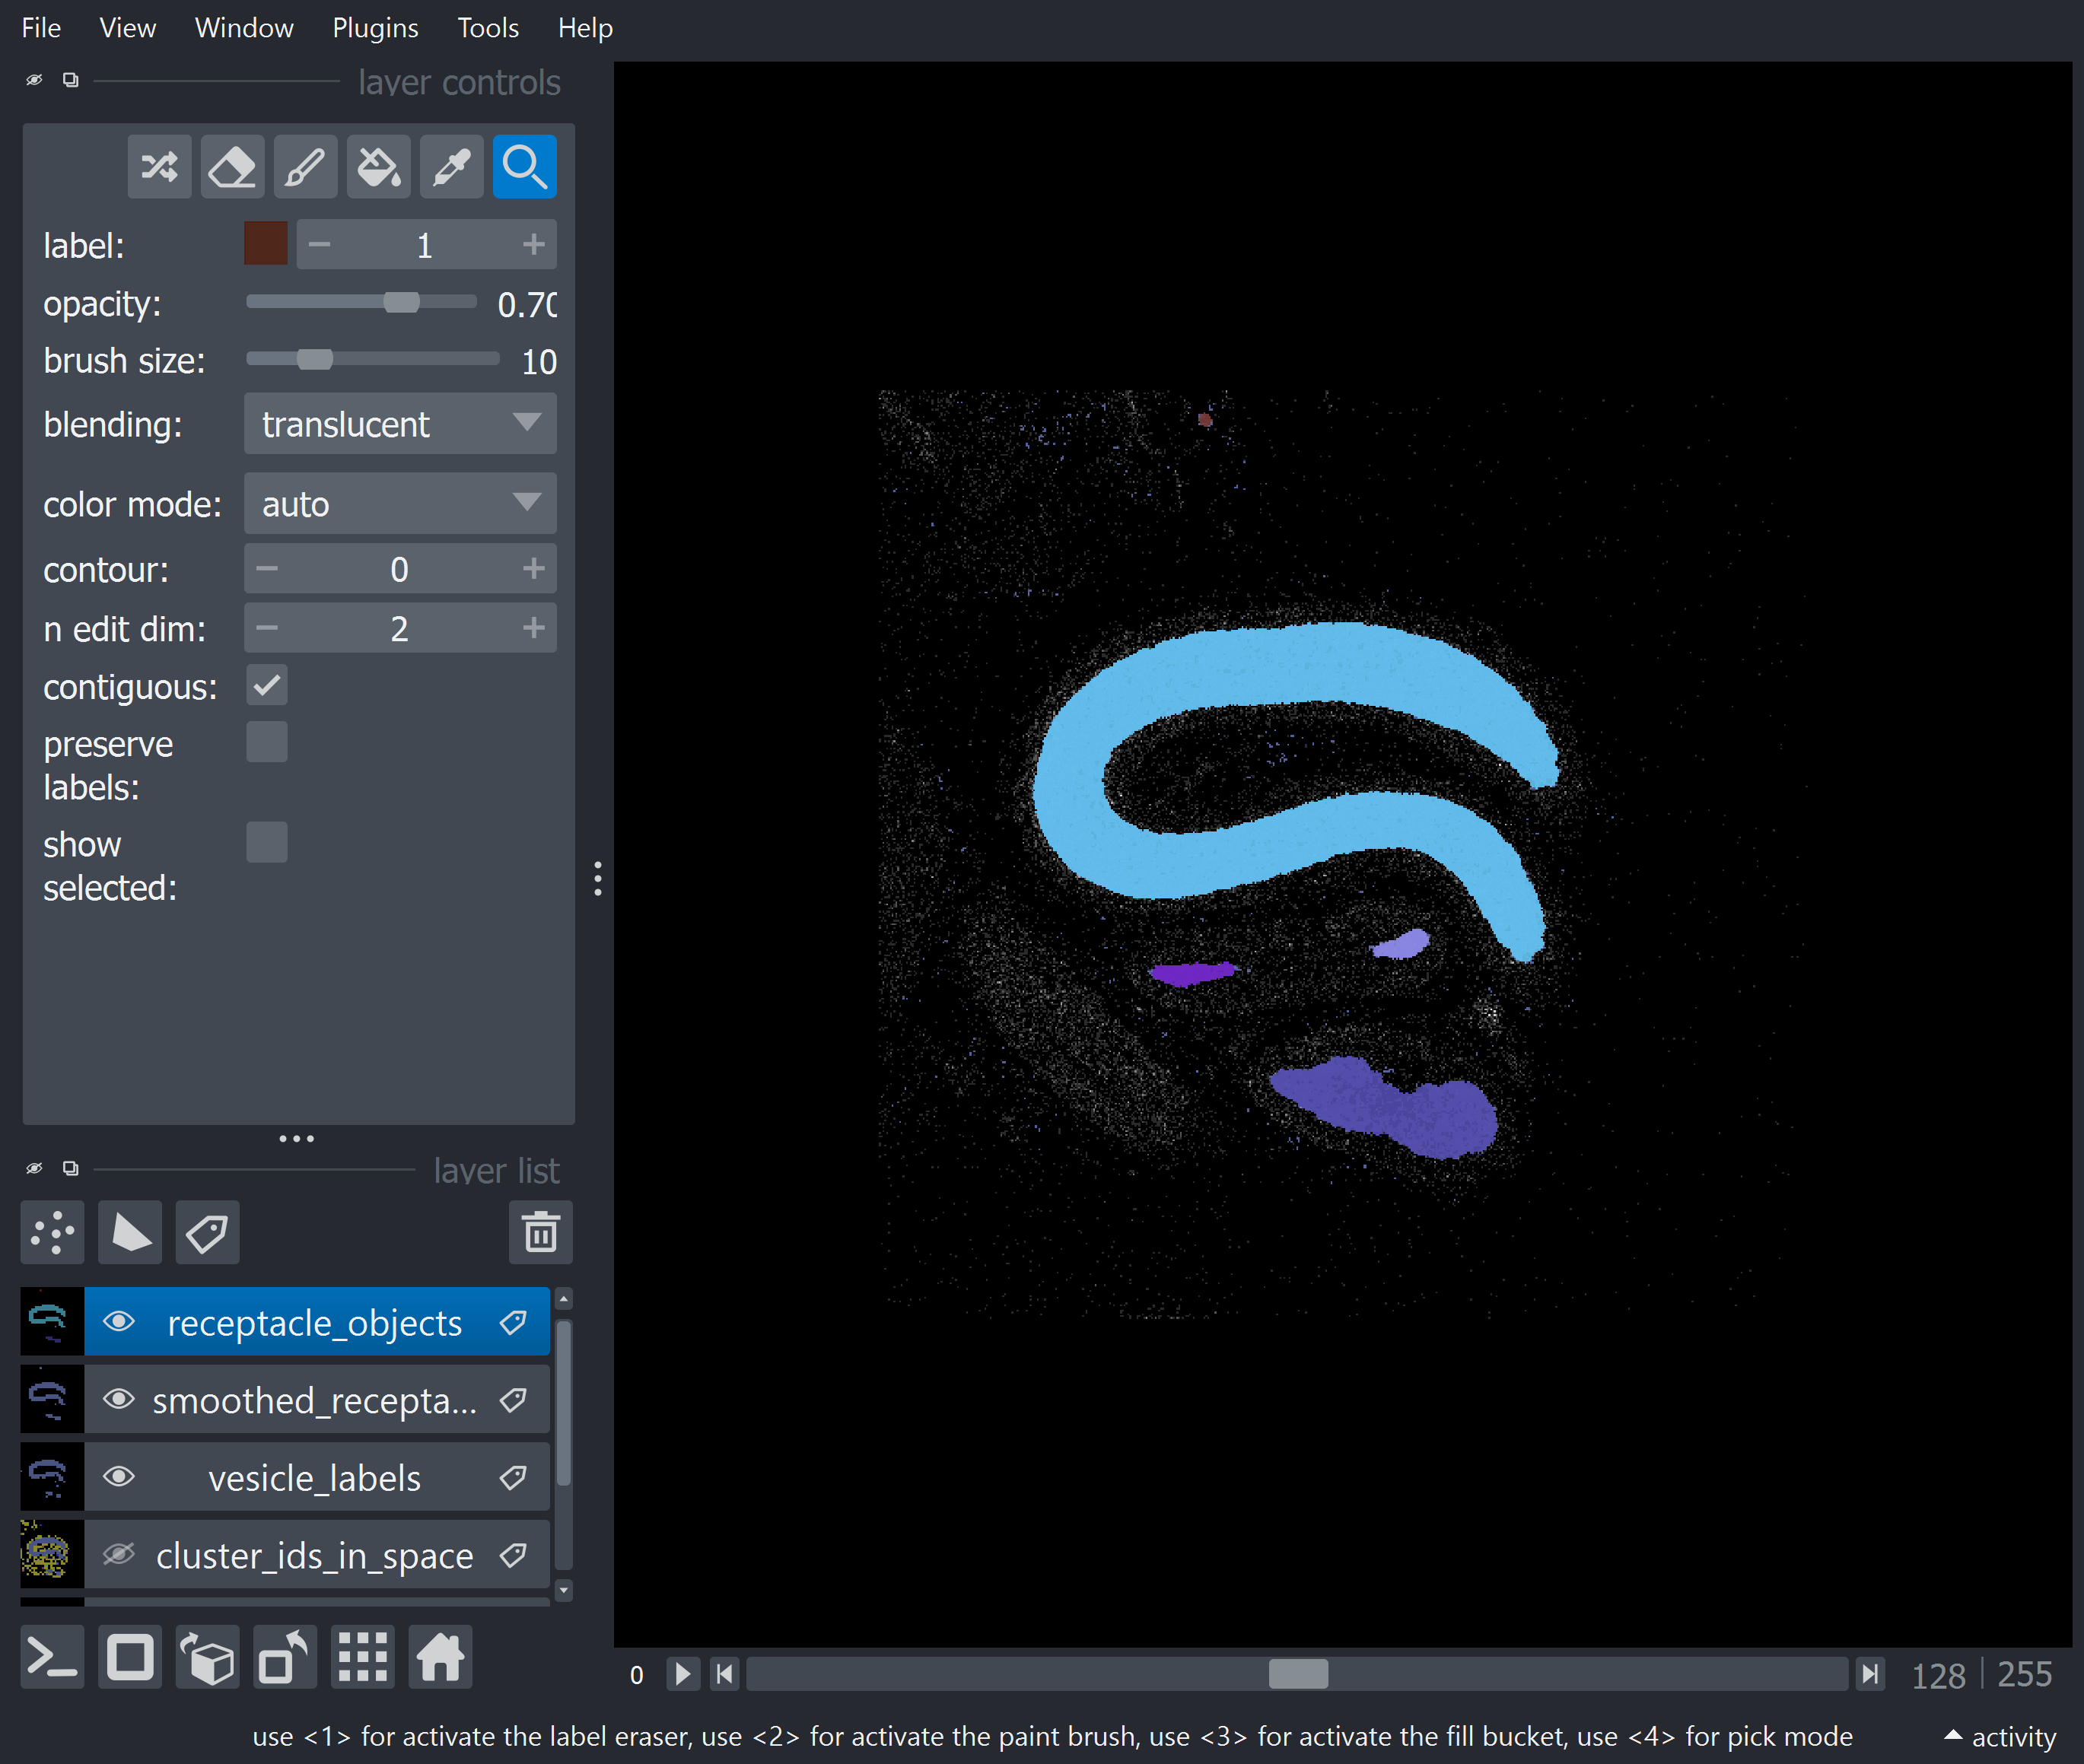

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


In [21]:
nbscreenshot(viewer)

Display table
Tools > Measurement > Show Table (nsr) > Select 'receptacle objects' layer and RUN

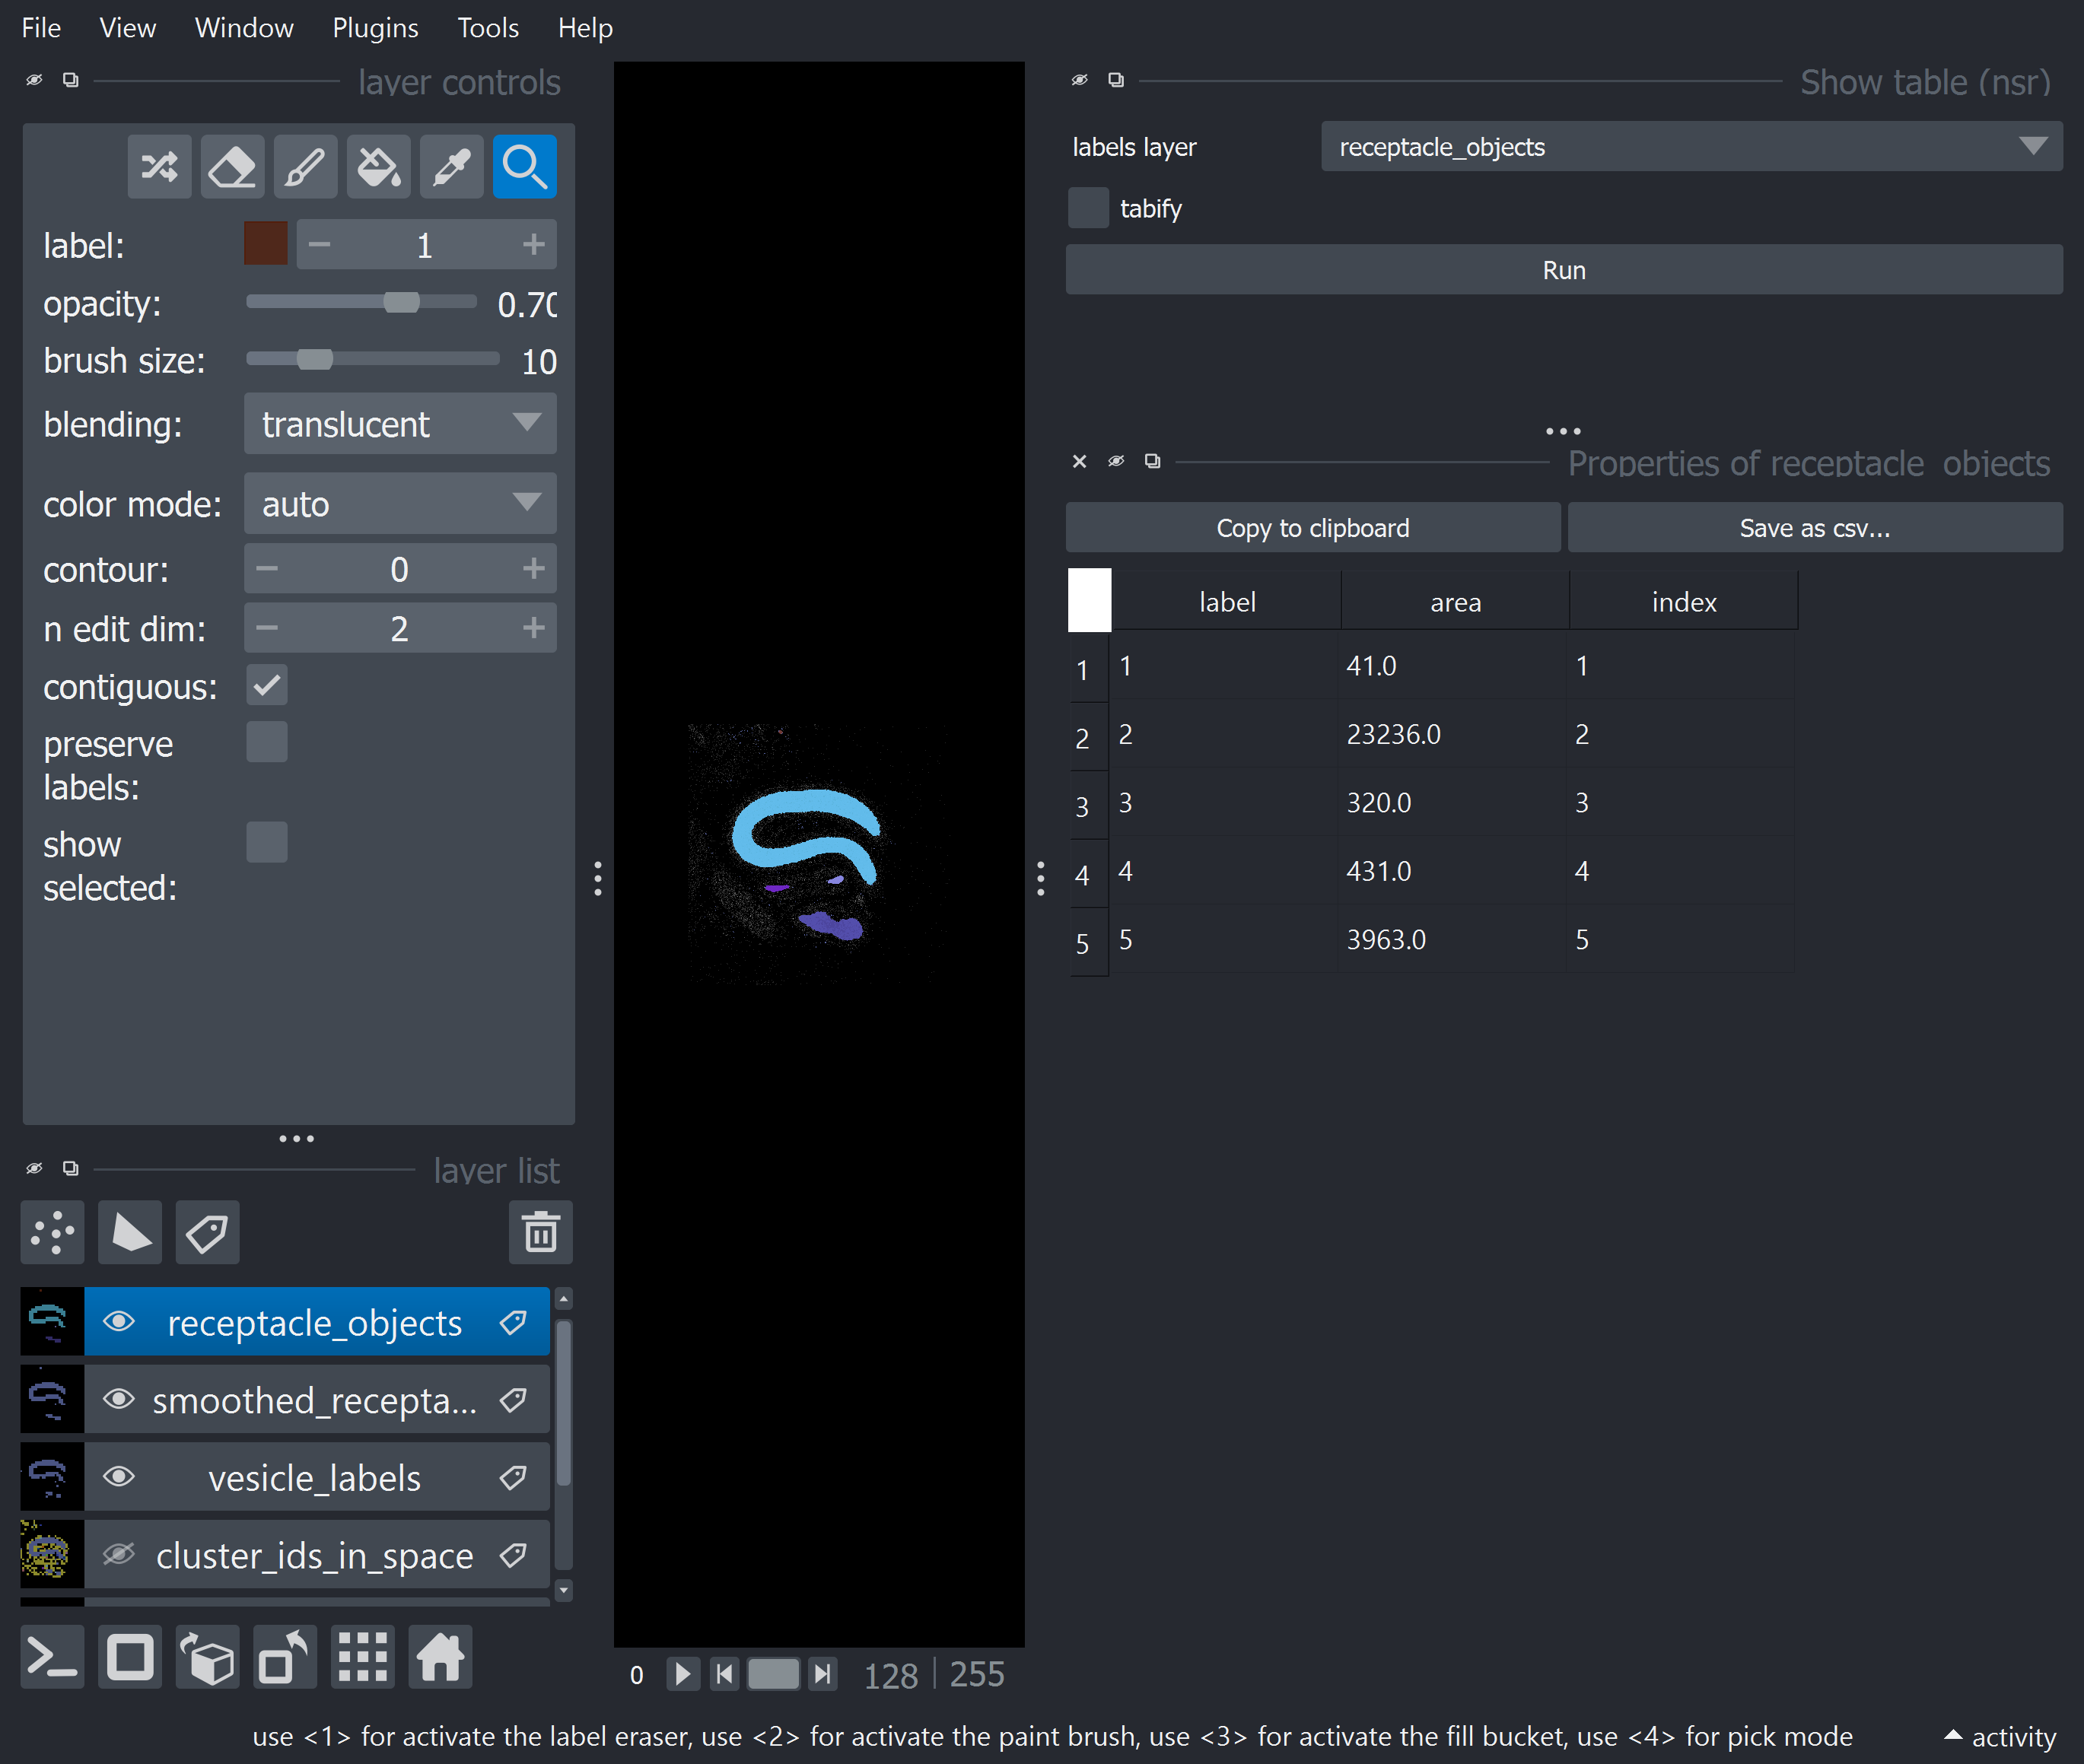

In [22]:
nbscreenshot(viewer)